In [1]:
# DB(저장공간)에 직접 접속해서, 
# 그 공간에 있는 데이터를 불러오고자 한다.  
# 데이터 분석 시, 파일을 불러와서 분석하는 경우가 많지만, 
# 데이터 인프라가 깔금하게 잘 조성되어 있는 경우에는, 
# DB에 직접 접속해서 가져오는 경우도 있다. 
# 스타트업 같은 경우, 클라우드 컴퓨팅을 사용해서
# 가상서버에 구축된 DB에 접속해서
# 그 안에 있는 데이터 테이블을 가져오는 방법을 알아야 한다. 
# 이번 시간에는 이 방법에 대해서 공부한다. 

In [2]:
# DB마다 접속하는 방법이 조금씩 다르다.
# 다만, 접속하는 방법은 DA(DB담당자)가 알려준다. 
# 그 DB에서 어떤 table을 가져오고, 
# 어떻게 데이터를 insert하고 어떻게 select하는지 알려준다. 

In [3]:
# DB에 접속해서 데이터를 갖고 올 때 사용하는 언어: SQL(Structue Query Language)
# 실무에서는 몇가지 SQL만 알고 있어도, 큰 어려움은 없다.  

In [11]:
import pandas as pd
import sqlite3 # 이 라이브러리 이용해서, DB에 접속하고, DB 안에 있는 (데이터)table을 가져올 것이다. 
# 데이터베이스: 데이터가 모여 있는 창고

In [13]:
# 잠겨있는 데이터베이스에 키를 넣고 열고 들어가보자.
# connect : 데이터 베이스에 접근할 수 있는 key
# 데이터베이스 문열고 들어가서 그 안에 있는 데이터를 가져올 수 있다.
connection = sqlite3.connect("sample.db") # 들고다니면서 사용해야 함

In [15]:
connection

실무에서 쓰이는 4가지 SQL 문법
- `Select`: DB에서 데이터를 찾을 때 / 데이터 테이블을 불러올 때 사용
- `Insert`: 데이터를 DB에 집어 넣을 때 
- `Update`: DB 데이터를 갱신할 때
- `Delete`: DB 데이터를 삭제할 때 (많이 안쓰인다.)
> 실무에서 데이터를 지우는 경우는 거의 없다. 

- 모든 table 정보 불러오기
- 특정 table만 불러오기
- 특정 col에 있는 데이터 불러오기
- 특정 row에 있는 데이터 불러오기

In [16]:
# DB에 접근해서 데이터 파일을 불러와보자
# query : DB 안에서 하는 행동들
query1 = "SELECT * FROM sqlite_master" # 문자열 형태로 sql 문법을 쓴다. 이 명령어가 하나의 query이다.
# sqlite_master: DB에 어떤 테이블이 있는지 테이블에 대한 정보 (25개의 데이터 테이블(하나의 파일 e.g. csv)이 있음)
# query1: DB내의 모든 테이블 정보를 가져오는 명령어

In [17]:
# pandas 활용
# read_sql_query(): 키, 쿼리 이용해서 데이터를 가져오는 pandas 함수
pd.read_sql_query(query1, connection) 

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [19]:
# 미국 음반시장 관련 데이터

In [24]:
# customers 테이블만 가져오고 싶다
query2 = "SELECT * FROM 'customers'" # 데이터 테이블 이름: customers
pd.read_sql_query(query2, connection) # customers 데이터 테이블 안에 있는 데이터 불러오기
# * : 모든 데이터(컬럼)
# 모든 열의 데이터를 불러옴

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [25]:
# company 컬럼만 가져오라는 쿼리문
query3 = "SELECT Company FROM 'customers'" 
pd.read_sql_query(query2, connection)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [26]:
# 행 추출: Canada 데이터만 가져오고 싶다. 
query4 = "SELECT * FROM 'customers' WHERE Country='Canada'" 
# Country가 Canada인 데이터의 모든 열을 불러와라.
pd.read_sql_query(query4, connection)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
1,14,Mark,Philips,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca,5
2,15,Jennifer,Peterson,Rogers Canada,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca,3
3,29,Robert,Brown,None,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,+1 (416) 363-8888,None,robbrown@shaw.ca,3
4,30,Edward,Francis,None,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,+1 (613) 234-3322,None,edfrancis@yachoo.ca,3
5,31,Martha,Silk,None,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,+1 (902) 450-0450,None,marthasilk@gmail.com,5
6,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
7,33,Ellie,Sullivan,None,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,+1 (867) 920-2233,None,ellie.sullivan@shaw.ca,3


In [28]:
# 쿼리문이 생각이 안난다면: df로 데려와서 pandas로 처리하면 된다. 
query = "SELECT * FROM 'customers'"
df1 = pd.read_sql_query(query, connection)

In [29]:
df1

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [31]:
# DB에서 불러온 데이터 테이블을 내 컴퓨터에 파일로 저장하고 싶다면, 
# to_csv나 to_excel로 저장한다. 
df1.to_excel("customer_file.xlsx")

In [ ]:
# 이런 식으로 DB에 접근해서 데이터를 가져올 수 있다. 

In [33]:
query = "SELECT * FROM 'invoices'"
df2 = pd.read_sql_query(query, connection)

In [34]:
df2

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [35]:
df2.columns

Index(['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress',
       'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode',
       'Total'],
      dtype='object')

In [36]:
# BillingCity별 invoice에 대한 Total값
df2.pivot_table(index="BillingCity", values="Total", aggfunc="sum")

,Total
BillingCity,
Amsterdam,40.62
Bangalore,36.64
Berlin,75.24
Bordeaux,39.62
Boston,37.62
Brasília,37.62
Brussels,37.62
Budapest,45.62
Buenos Aires,37.62


<Axes: xlabel='BillingCity', ylabel='Total'>

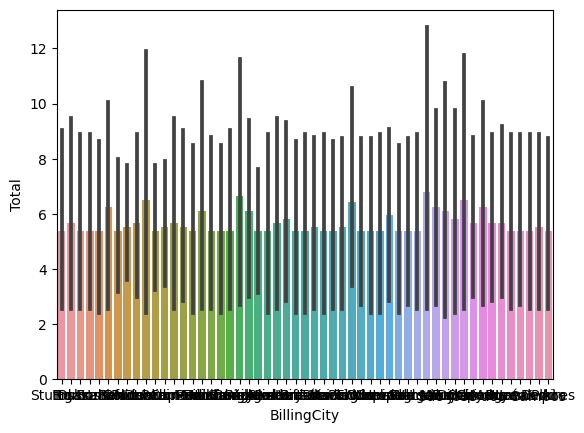

In [40]:
# 시각화 하고 싶다면 seaborn 불러와서 배운대로 한다. 
# 한글이 없으므로 한글 font 설정 생략한다. 
import seaborn as sns
sns.barplot(data=df2, x="BillingCity", y="Total") # BillingCity별 Total값 계산

<Axes: xlabel='Total', ylabel='BillingCity'>

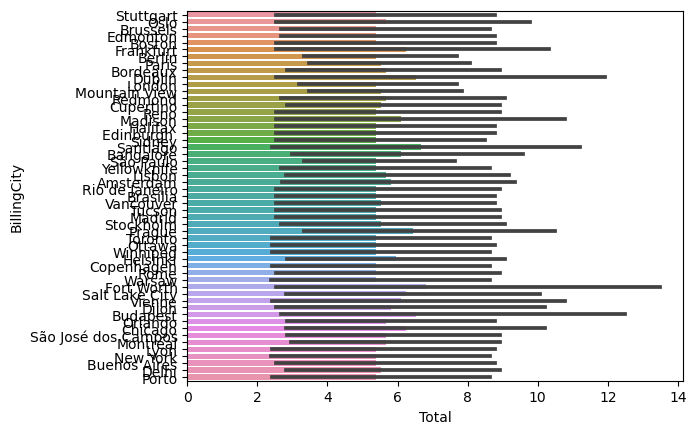

In [41]:
# BillingCity의 unique val이 너무 많으므로, x와 y를 바꿔보자.
sns.barplot(data=df2, x="Total", y="BillingCity")

<Axes: xlabel='Total', ylabel='BillingCity'>

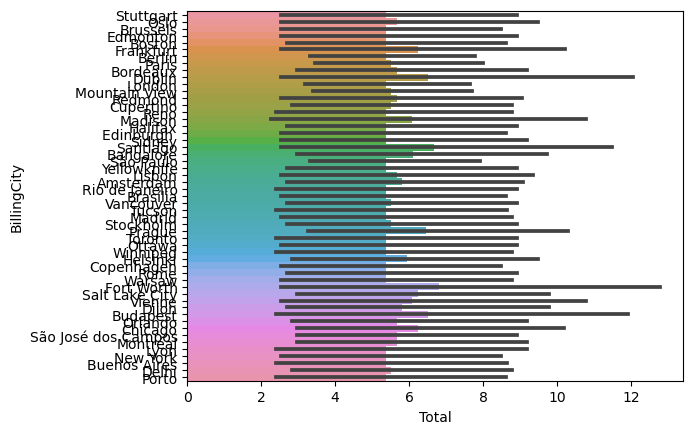

In [46]:
sns.barplot(data=df2, x="Total", y="BillingCity", width=1.0)

<Axes: xlabel='Total', ylabel='BillingCity'>

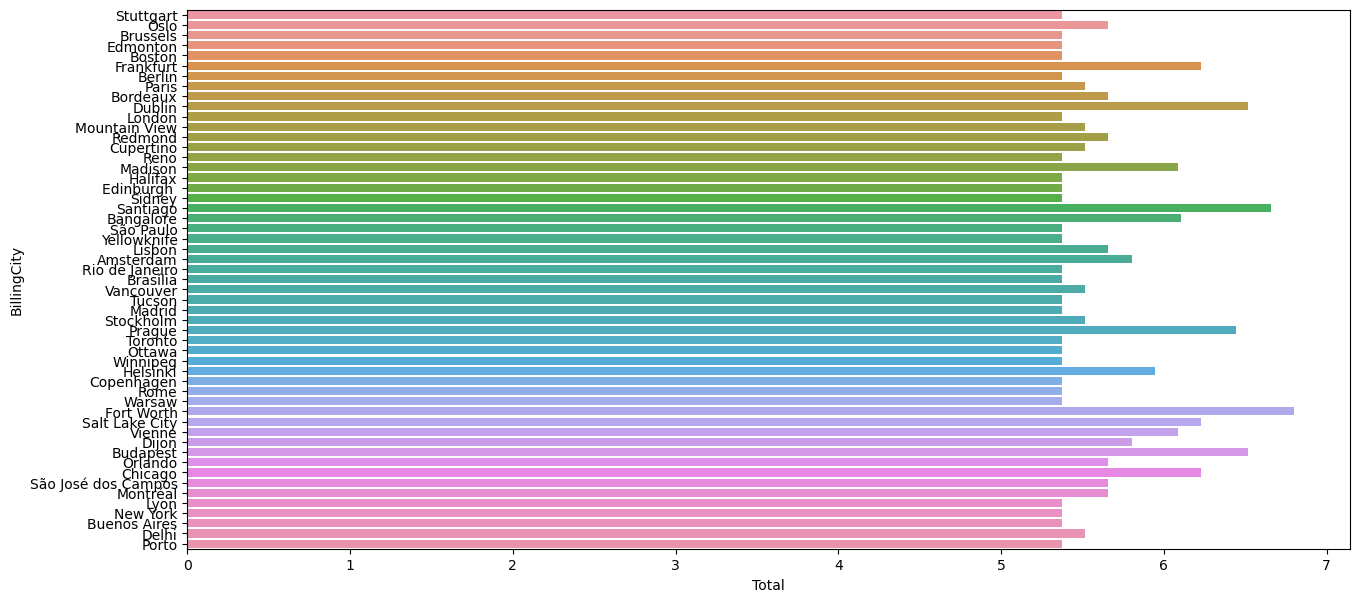

In [45]:
# x, y 바꿨는데도 겹친다. 
# 바꿨는데도 겹치면 그래프 사이즈를 키워준다: 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
sns.barplot(data=df2, x="Total", y="BillingCity", errorbar=None, width=0.8)

In [51]:
df2["InvoiceDate"]

0      2009-01-01 00:00:00
1      2009-01-02 00:00:00
2      2009-01-03 00:00:00
3      2009-01-06 00:00:00
4      2009-01-11 00:00:00
              ...         
407    2013-12-05 00:00:00
408    2013-12-06 00:00:00
409    2013-12-09 00:00:00
410    2013-12-14 00:00:00
411    2013-12-22 00:00:00
Name: InvoiceDate, Length: 412, dtype: object

In [50]:
pd.to_datetime(df2["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

0     2009-01-01
1     2009-01-02
2     2009-01-03
3     2009-01-06
4     2009-01-11
         ...    
407   2013-12-05
408   2013-12-06
409   2013-12-09
410   2013-12-14
411   2013-12-22
Name: InvoiceDate, Length: 412, dtype: datetime64[ns]

In [53]:
df2["Date(dt)"] = pd.to_datetime(df2["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

<Axes: xlabel='Date(dt)', ylabel='Total'>

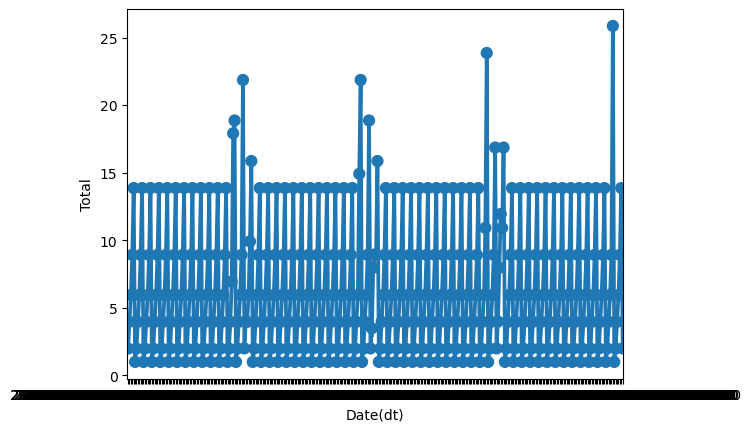

In [56]:
# pointplot:
# 일자별 total 값의 그래프
sns.pointplot(data=df2, x="Date(dt)", y="Total")
#날짜가 너무 많다. pointplot 말고 lineplot으로 바꿔보자

<Axes: xlabel='Date(dt)', ylabel='Total'>

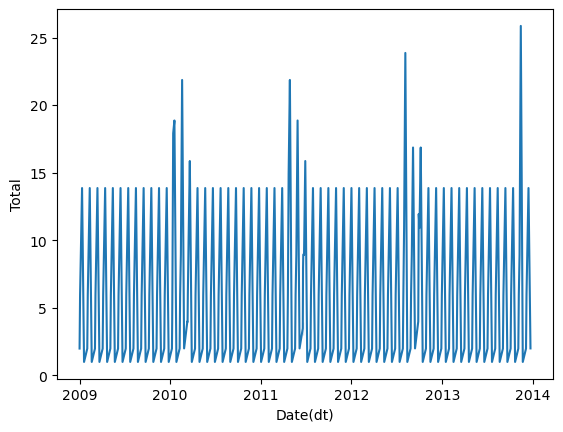

In [57]:
sns.lineplot(data=df2, x="Date(dt)", y="Total") # 평균이 계산 된거임

<Axes: xlabel='Date(dt)', ylabel='Total'>

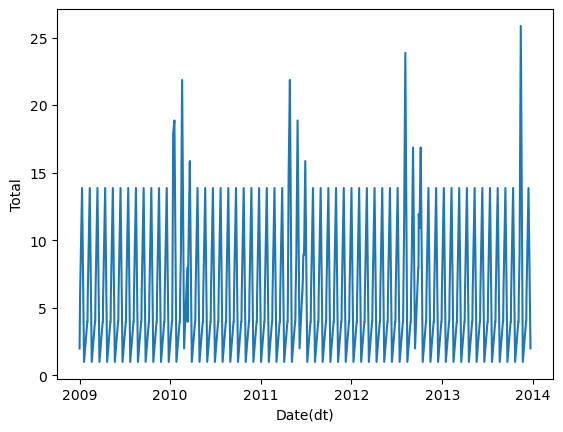

In [59]:
sns.lineplot(data=df2, x="Date(dt)", y="Total", estimator="sum") # 합 계산
# 중간 중간에 peak이 있다.
# 시간적인 추세는 확인해볼 수 없겠다. 

<Axes: xlabel='Date(dt)', ylabel='Total'>

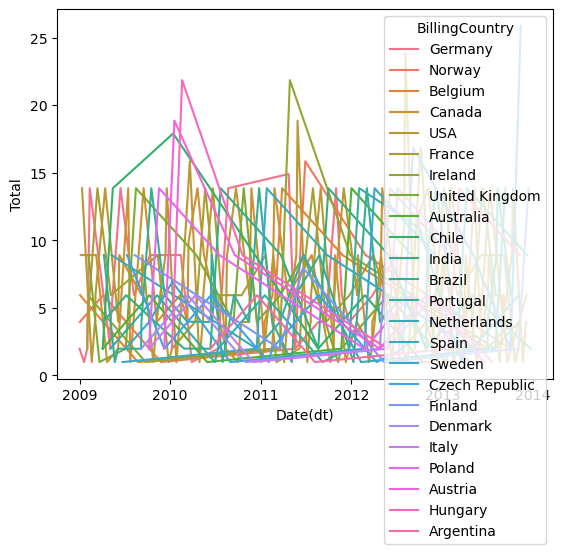

In [61]:
# 나라별로 나눠서
sns.lineplot(data=df2, x="Date(dt)", y="Total", estimator="sum", hue="BillingCountry")
# 데이터가 너무 많아서 지저분하게 나온다.

In [62]:
# 여기까지 data에 대한 insight를 찾을 수 있는게 없다.
# 사실 실무에서 분석을 진행하면, 이렇다. 
# 시각화하고, pivot table 써도 이렇게 거지같이 나오는 경우가 대부분이다. 

In [ ]:
# 지금 우리는 DB 안에 있는 데이터 자료들을 다 파악하고 분석하는게 아니다. 
# 그래서 여기서 어떤 것들을 분석할 것인가에 대한 구체적인 plan이 아직 없다. 
# DB에 접근해서 데이터를 가져오는 경우에는, 
# DB 안에 DB 설계서라는게 있다. 
# DB 안에 어떤 어떤 table로 구성이 되어 있고, 
# 각 table에는 어떤 어떤 변수가 있고, 
# 그 변수들의 dtype(숫자 데이터냐, 문자 데이터냐)
# 그리고 그 변수가 설명하는 바가 뭐냐가 다 적혀져 있다.

# 회사에서 DB를 담당하는 사람이 
# DB 설계서를 갖고 있다. 
# 그래서 사전적으로, 설계서를 요청을 하고 받아서 확인해야 한다. 
# 그 자료를 확인하고, 분석 계획을 수립해서, 
# master table(전체 테이블) 중에, 원하는 table, 
# 분석할 table만 가져와서 분석작업을 해줘야 한다.

# 보통 이렇게 진행하고, 이렇게 해야 데이터를 쉽게 처리할 수 있다.

In [ ]:
# 샘플이라는 파일 DB에 접근해서, 데이터 테이블을 가져오는 연습을 해봤다. 


# 근데 만약에 내가, MariaDB를 쓴다, MongoDB를 쓴다, Oracle을 쓴다 했을 때는, 
# pymysql이나 sql 문법을 지원하는 라이브러를 이용해서 데이터 파일을 불러와야 한다. 


# 쿼리 문법은 다 똑같다. 
# 불러올 때는 SELECT, 집어넣을 때는 INSERT 쓰고 